Import packages

In [31]:
import pandas as pd

Import datsets

In [32]:
natural_disasters = pd.read_csv('naturaldisasters.csv', on_bad_lines='skip')
home_data = pd.read_csv('home_insurace_premiums.csv', on_bad_lines='skip')
commercial_data = pd.read_csv('commercial _insurance_premiums.csv', on_bad_lines='skip')
inflation_data = pd.read_csv('US_Inflation.csv', on_bad_lines='skip')

Data tidying and recoding

In [33]:
# check for missing values
print("Natural Disaster missing values:")
print(natural_disasters.isnull().sum())

print("\nHome insurance premiums missing values:")
print(home_data.isnull().sum())

print("\nCommercial insurance premiums missing values:")
print(commercial_data.isnull().sum())

print("\nInflation data missing values:")
print(inflation_data.isnull().sum())

Natural Disaster missing values:
id                  0
country             0
iso3              315
gwno              434
year                0
geo_id              0
geolocation         0
level               0
adm1                0
adm2            25883
adm3            37543
location            0
historical          0
hist_country    39717
disastertype        0
disasterno          0
latitude            0
longitude           0
dtype: int64

Home insurance premiums missing values:
observation_date    0
PCU9241269241262    0
dtype: int64

Commercial insurance premiums missing values:
observation_date    0
PCU9241269241265    0
dtype: int64

Inflation data missing values:
observation_date    0
FPCPITOTLZGUSA      0
dtype: int64


In [34]:
# Summary of each dataset
print("Natural Disaster Data summary:")
print(natural_disasters.info())
print(natural_disasters.describe())

print("\nHome insurance data summary:")
print(home_data.info())
print(home_data.describe())

print("\nCommercial insurance data summary:")
print(commercial_data.info())
print(commercial_data.describe())

print("\nInflation data summary:")
print(inflation_data.info())
print(inflation_data.describe())

Natural Disaster Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39953 entries, 0 to 39952
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            39953 non-null  object 
 1   country       39953 non-null  object 
 2   iso3          39638 non-null  object 
 3   gwno          39519 non-null  float64
 4   year          39953 non-null  int64  
 5   geo_id        39953 non-null  int64  
 6   geolocation   39953 non-null  object 
 7   level         39953 non-null  int64  
 8   adm1          39953 non-null  object 
 9   adm2          14070 non-null  object 
 10  adm3          2410 non-null   object 
 11  location      39953 non-null  object 
 12  historical    39953 non-null  int64  
 13  hist_country  236 non-null    object 
 14  disastertype  39953 non-null  object 
 15  disasterno    39953 non-null  object 
 16  latitude      39953 non-null  float64
 17  longitude     39953 non-null  float64


Rename and drop variables

In [35]:
inflation_data.rename(columns={"FPCPITOTLZGUSA": "inflation_rate"}, inplace=True)

home_data.rename(columns={"PCU9241269241262": "Home_Insurance_PPI"}, inplace=True)

commercial_data.rename(columns={"PCU9241269241265": "Commercial_Insurance_PPI"}, inplace=True)

natural_disasters = natural_disasters.rename(columns={"id": "disaster_id"})
natural_disasters = natural_disasters[natural_disasters["country"] == "United States"]
natural_disasters = natural_disasters[[
    "disaster_id", "country", "iso3", "year", "geo_id", "geolocation",
    "location", "disastertype", "latitude", "longitude", "adm1"
]]

Fix date format to be consistant 

In [36]:
# observation_date to standardized datetime format
home_data["observation_date"] = pd.to_datetime(home_data["observation_date"], errors='coerce')
commercial_data["observation_date"] = pd.to_datetime(commercial_data["observation_date"], errors='coerce')
inflation_data["observation_date"] = pd.to_datetime(inflation_data["observation_date"], errors='coerce')

# check
print("Rows with invalid dates in home_data:", home_data[home_data["observation_date"].isna()])
print("Rows with invalid dates in commercial_data:", commercial_data[commercial_data["observation_date"].isna()])
print("Rows with invalid dates in inflation_data:", inflation_data[inflation_data["observation_date"].isna()])

# drop rows with missing observation dates
home_data.dropna(subset=["observation_date"], inplace=True)
commercial_data.dropna(subset=["observation_date"], inplace=True)
inflation_data.dropna(subset=["observation_date"], inplace=True)


Rows with invalid dates in home_data: Empty DataFrame
Columns: [observation_date, Home_Insurance_PPI]
Index: []
Rows with invalid dates in commercial_data: Empty DataFrame
Columns: [observation_date, Commercial_Insurance_PPI]
Index: []
Rows with invalid dates in inflation_data: Empty DataFrame
Columns: [observation_date, inflation_rate]
Index: []


clean invalid dates

In [37]:
home_data.dropna(subset=["observation_date"], inplace=True)
commercial_data.dropna(subset=["observation_date"], inplace=True)
inflation_data.dropna(subset=["observation_date"], inplace=True)

Merge datasets

In [38]:
merged_data = pd.merge(home_data, commercial_data, on='observation_date', how='outer')
merged_data = pd.merge(merged_data, inflation_data, on='observation_date', how='outer')

#check merged dataset 
print(merged_data.shape)  
print(merged_data.head())


(358, 4)
  observation_date  Home_Insurance_PPI  Commercial_Insurance_PPI  \
0       1960-01-01                 NaN                       NaN   
1       1961-01-01                 NaN                       NaN   
2       1962-01-01                 NaN                       NaN   
3       1963-01-01                 NaN                       NaN   
4       1964-01-01                 NaN                       NaN   

   inflation_rate  
0        1.457976  
1        1.070724  
2        1.198773  
3        1.239669  
4        1.278912  


Add Year column for easier testing of data between all datasets and merge natural disasters dataset

In [39]:
merged_data['year'] = merged_data['observation_date'].dt.year


merged_data = pd.merge(merged_data, natural_disasters, on='year', how='outer')

# Check final merged dataset
print(merged_data.shape)
print(merged_data.head())
print(merged_data.columns)

(33373, 15)
  observation_date  Home_Insurance_PPI  Commercial_Insurance_PPI  \
0       1960-01-01                 NaN                       NaN   
1       1961-01-01                 NaN                       NaN   
2       1962-01-01                 NaN                       NaN   
3       1963-01-01                 NaN                       NaN   
4       1963-01-01                 NaN                       NaN   

   inflation_rate  year disaster_id        country iso3   geo_id geolocation  \
0        1.457976  1960        6533  United States  USA  23740.0      Hawaii   
1        1.070724  1961        6535  United States  USA  25725.0       Texas   
2        1.198773  1962         NaN            NaN  NaN      NaN         NaN   
3        1.239669  1963     01-1368  United States  USA  28763.0      Gaines   
4        1.239669  1963     01-1368  United States  USA  28764.0     Georgia   

       location disastertype   latitude   longitude     adm1  
0        Hawaii   earthquake  20.24

Inflation Rate Data Analysis and Visualization

   year  inflation_rate
0  1960        1.457976
1  1961        1.070724
2  1962        1.198773
3  1963        1.239669
4  1963        1.239669


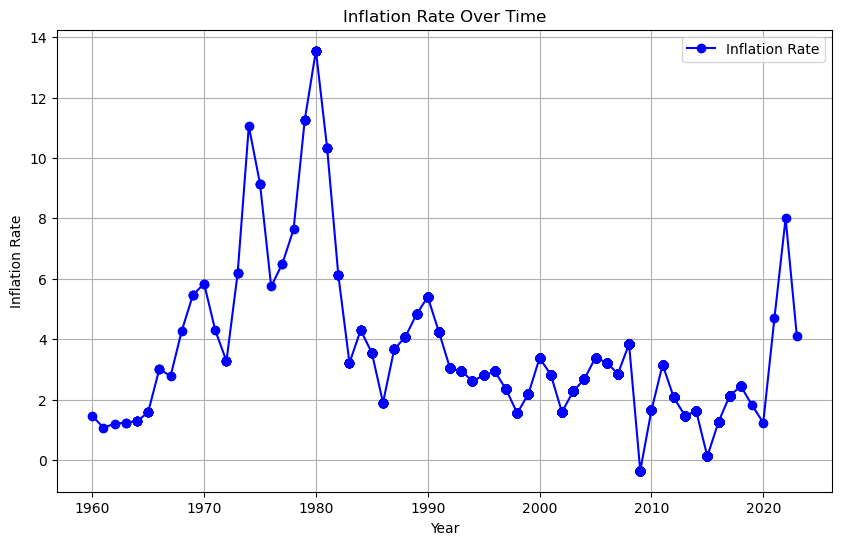

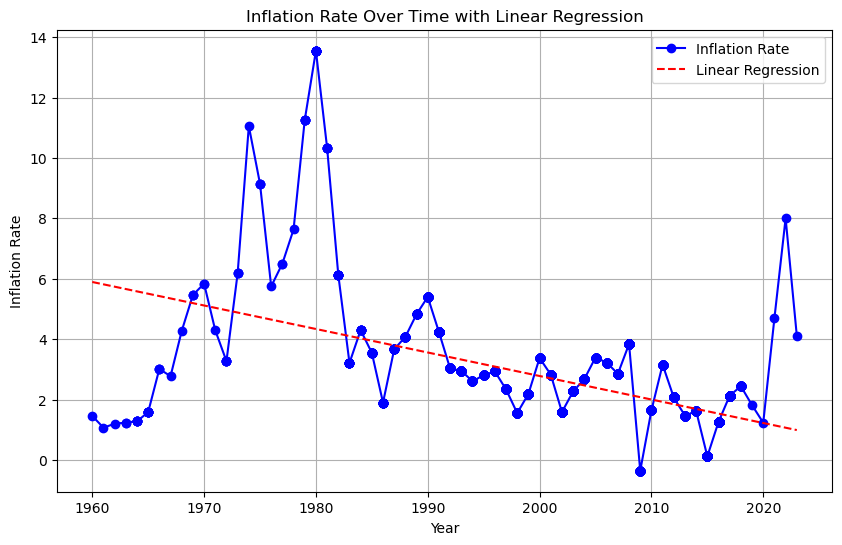

Inflation Linear Regression Slope: -0.0778145883775949


In [40]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

print(merged_data[['year', 'inflation_rate']].head())
merged_data = merged_data.dropna(subset=['inflation_rate'])

# inflation rate over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['year'], merged_data['inflation_rate'], marker='o', linestyle='-', color='b', label='Inflation Rate')
plt.title('Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.legend()
plt.show()


# linear regression
X = merged_data[['year']]  # independent variable (year)
y = merged_data['inflation_rate']  # dependent variable (inflation_rate)

inflation_model = LinearRegression()
inflation_model.fit(X, y)

merged_data['predicted_inflation_rate'] = inflation_model.predict(X)

# plot inflation rate with the linear regression line
plt.figure(figsize=(10, 6))
plt.plot(merged_data['year'], merged_data['inflation_rate'], marker='o', linestyle='-', color='b', label='Inflation Rate')
plt.plot(merged_data['year'], merged_data['predicted_inflation_rate'], linestyle='--', color='r', label='Linear Regression')
plt.title('Inflation Rate Over Time with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.legend()
plt.show()

print(f"Inflation Linear Regression Slope: {inflation_model.coef_[0]}")



Inflation since 2000

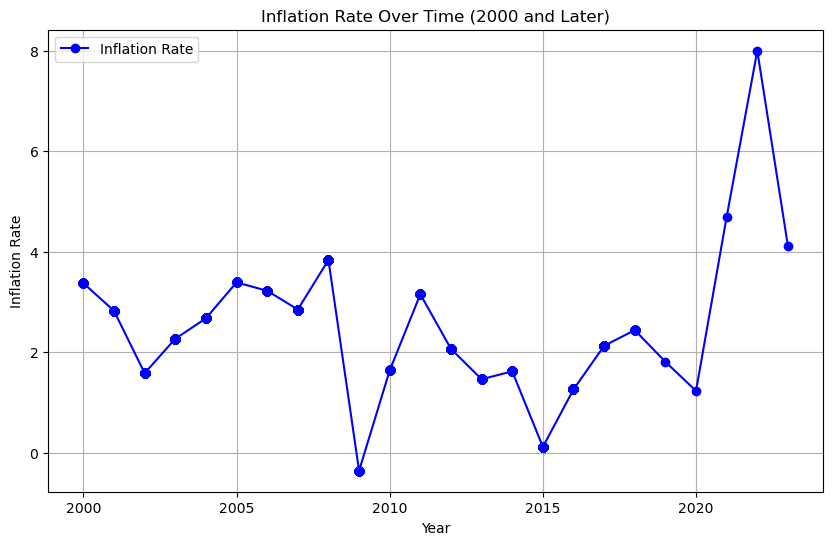

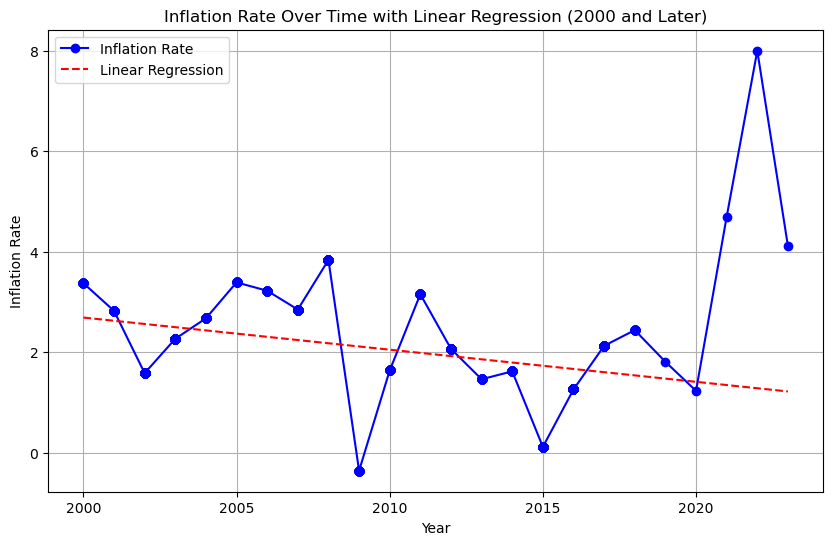

Inflation Linear Regression Slope (2000 and Later): -0.06395429870449372


In [41]:
# inflation rate over time (2000 and later)
plt.figure(figsize=(10, 6))
plt.plot(merged_data[merged_data['year'] >= 2000]['year'], 
         merged_data[merged_data['year'] >= 2000]['inflation_rate'], 
         marker='o', linestyle='-', color='b', label='Inflation Rate')
plt.title('Inflation Rate Over Time (2000 and Later)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.legend()
plt.show()

# linear regression
X = merged_data[merged_data['year'] >= 2000][['year']]  # independent variable (year)
y = merged_data[merged_data['year'] >= 2000]['inflation_rate']  # dependent variable (inflation_rate)

inflation_model = LinearRegression()
inflation_model.fit(X, y)

merged_data.loc[merged_data['year'] >= 2000, 'predicted_inflation_rate'] = inflation_model.predict(X)

# plot inflation rate with the linear regression line (2000 and later)
plt.figure(figsize=(10, 6))
plt.plot(merged_data[merged_data['year'] >= 2000]['year'], 
         merged_data[merged_data['year'] >= 2000]['inflation_rate'], 
         marker='o', linestyle='-', color='b', label='Inflation Rate')
plt.plot(merged_data[merged_data['year'] >= 2000]['year'], 
         merged_data[merged_data['year'] >= 2000]['predicted_inflation_rate'], 
         linestyle='--', color='r', label='Linear Regression')
plt.title('Inflation Rate Over Time with Linear Regression (2000 and Later)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.legend()
plt.show()

print(f"Inflation Linear Regression Slope (2000 and Later): {inflation_model.coef_[0]}")

Property Insurance Rates

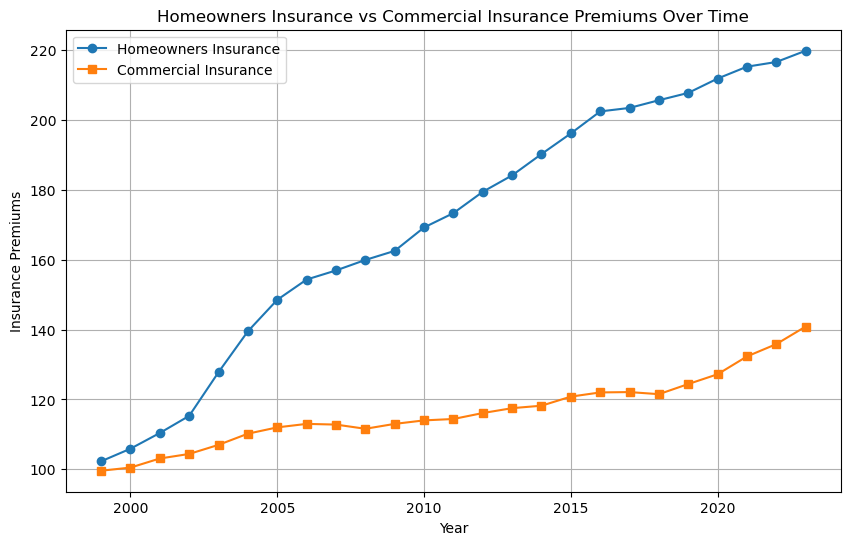

In [42]:
home_insurance_by_year = merged_data.groupby('year')['Home_Insurance_PPI'].mean()
commercial_insurance_by_year = merged_data.groupby('year')['Commercial_Insurance_PPI'].mean()

plt.figure(figsize=(10, 6))
plt.plot(home_insurance_by_year.index, home_insurance_by_year.values, marker='o', label='Homeowners Insurance')
plt.plot(commercial_insurance_by_year.index, commercial_insurance_by_year.values, marker='s', label='Commercial Insurance')

plt.title('Homeowners Insurance vs Commercial Insurance Premiums Over Time')
plt.xlabel('Year')
plt.ylabel('Insurance Premiums')
plt.legend()
plt.grid(True)
plt.show()


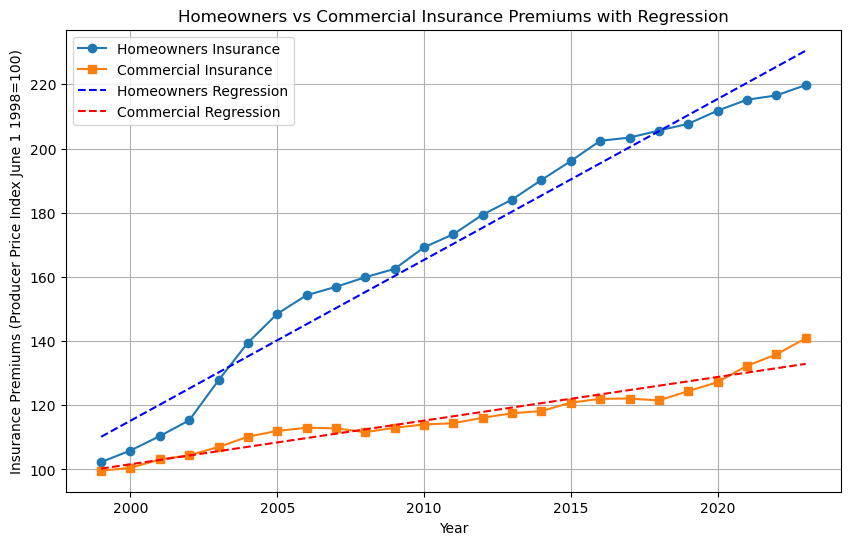

Home Insurance Linear Regression Slope: 5.012331538461537
Commercial Insurance Linear Regression Slope: 1.3597261538461534


In [43]:
# prepare data for regression
home_insurance_by_year = home_insurance_by_year.dropna()
commercial_insurance_by_year = commercial_insurance_by_year.dropna()

X_home = home_insurance_by_year.index.values.reshape(-1, 1)  # Independent variable (years)
y_home = home_insurance_by_year.values  # Dependent variable (Home Insurance Premiums)

X_commercial = commercial_insurance_by_year.index.values.reshape(-1, 1)  # Independent variable (years)
y_commercial = commercial_insurance_by_year.values  # Dependent variable (Commercial Insurance Premiums)

# fit linear regression models
home_model = LinearRegression()
home_model.fit(X_home, y_home)
home_predicted = home_model.predict(X_home)

commercial_model = LinearRegression()
commercial_model.fit(X_commercial, y_commercial)
commercial_predicted = commercial_model.predict(X_commercial)

# plot with regression lines
plt.figure(figsize=(10, 6))
plt.plot(home_insurance_by_year.index, home_insurance_by_year.values, marker='o', label='Homeowners Insurance')
plt.plot(commercial_insurance_by_year.index, commercial_insurance_by_year.values, marker='s', label='Commercial Insurance')
plt.plot(home_insurance_by_year.index, home_predicted, linestyle='--', color='blue', label='Homeowners Regression')
plt.plot(commercial_insurance_by_year.index, commercial_predicted, linestyle='--', color='red', label='Commercial Regression')

plt.title('Homeowners vs Commercial Insurance Premiums with Regression')
plt.xlabel('Year')
plt.ylabel('Insurance Premiums (Producer Price Index June 1 1998=100)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Home Insurance Linear Regression Slope: {home_model.coef_[0]}")
print(f"Commercial Insurance Linear Regression Slope: {commercial_model.coef_[0]}")


Natural Disaster Visualization and Analysis

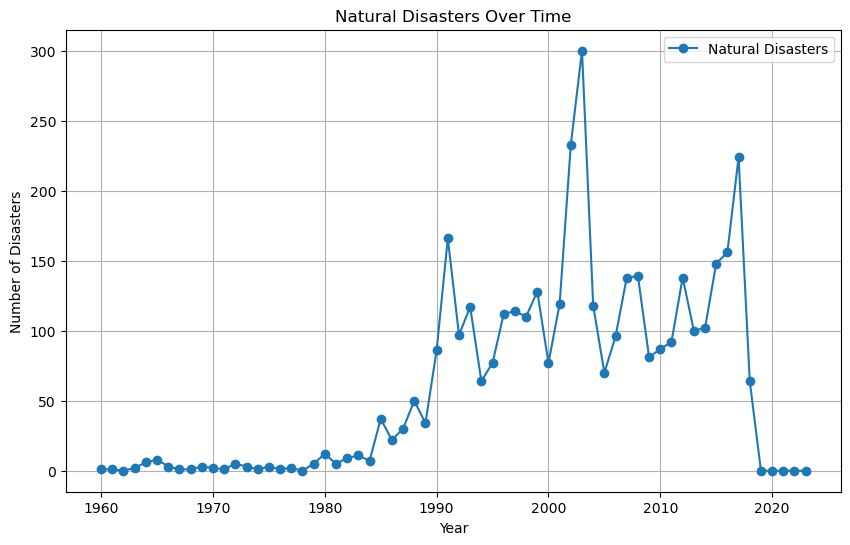

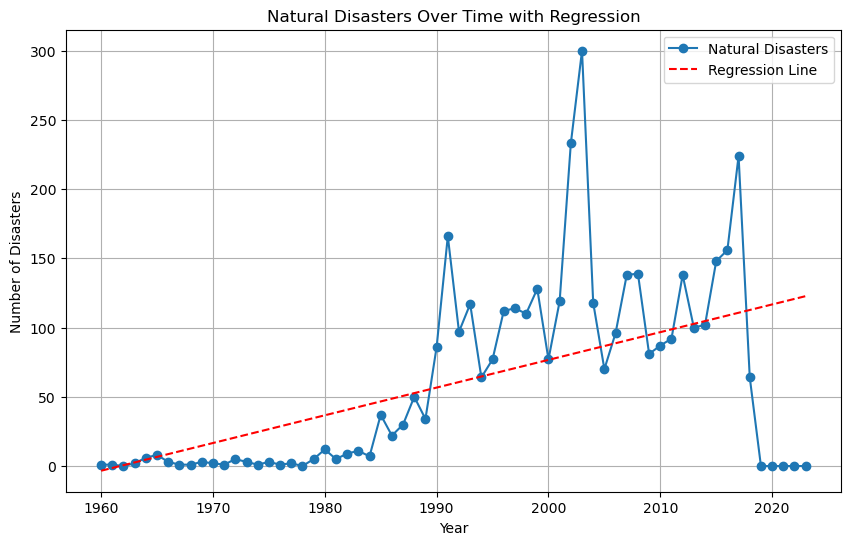

Natural Disasters Linear Regression Slope: 2.0018086080586093


In [44]:
natural_disasters_by_year = merged_data.groupby('year')['disaster_id'].count()

plt.figure(figsize=(10, 6))
plt.plot(natural_disasters_by_year.index, natural_disasters_by_year.values, marker='o', label='Natural Disasters')

plt.title('Natural Disasters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend()
plt.grid(True)
plt.show()

# prep data for regression
natural_disasters_by_year = natural_disasters_by_year.dropna()

X_disasters = natural_disasters_by_year.index.values.reshape(-1, 1)  # independent variable (years)
y_disasters = natural_disasters_by_year.values  # dependent variable (num of disasters)

# linear regression model
disaster_model = LinearRegression()
disaster_model.fit(X_disasters, y_disasters)
disaster_predicted = disaster_model.predict(X_disasters)

# plot with regression line
plt.figure(figsize=(10, 6))
plt.plot(natural_disasters_by_year.index, natural_disasters_by_year.values, marker='o', label='Natural Disasters')
plt.plot(natural_disasters_by_year.index, disaster_predicted, linestyle='--', color='red', label='Regression Line')

plt.title('Natural Disasters Over Time with Regression')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend()
plt.grid(True)
plt.show()

print(f"Natural Disasters Linear Regression Slope: {disaster_model.coef_[0]}")


Natural disasters from 2000

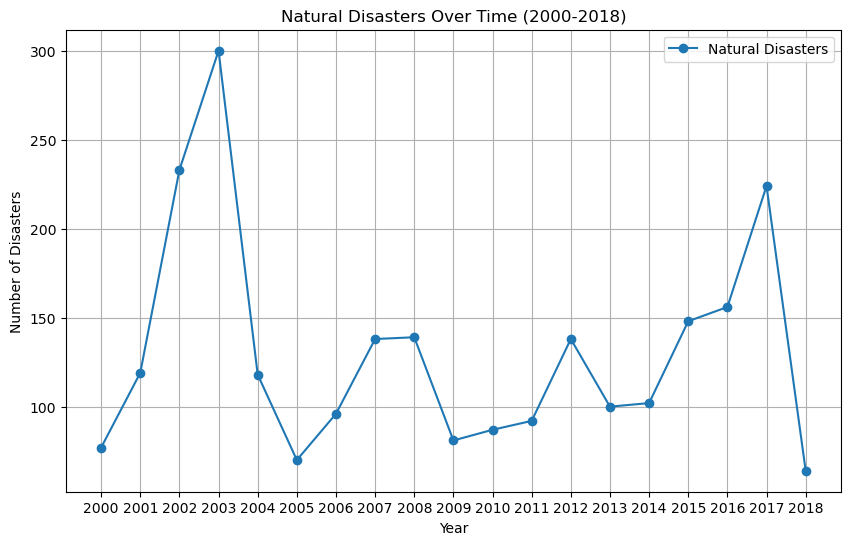

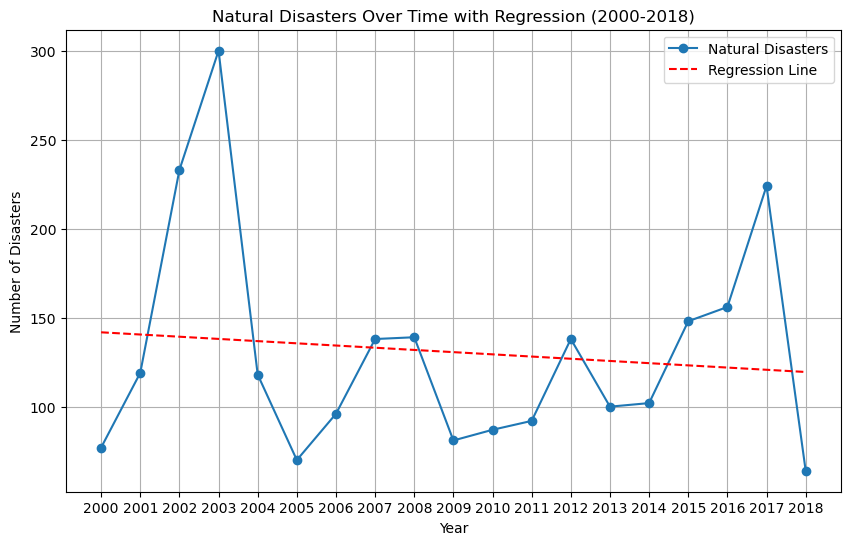

Natural Disasters Linear Regression Slope: -1.2385964912280703


In [45]:
natural_disasters_by_year = merged_data.groupby('year')['disaster_id'].count()

# years from 2000 to 2018
natural_disasters_since2000 = natural_disasters_by_year[(natural_disasters_by_year.index >= 2000) & 
                                                         (natural_disasters_by_year.index <= 2018)]

# natural disasters trend over time (2000-2018)
plt.figure(figsize=(10, 6))
plt.plot(natural_disasters_since2000.index, natural_disasters_since2000.values, marker='o', label='Natural Disasters')

plt.title('Natural Disasters Over Time (2000-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.xticks(range(2000, 2019))
plt.legend()
plt.grid(True)
plt.show()

# prep data for regression
natural_disasters_since2000 = natural_disasters_since2000.dropna()

X_disasters = natural_disasters_since2000.index.values.reshape(-1, 1)  # independent variable (years)
y_disasters = natural_disasters_since2000.values  # dependent variable (Number of Disasters)

# linear regression model
disaster_model = LinearRegression()
disaster_model.fit(X_disasters, y_disasters)
disaster_predicted = disaster_model.predict(X_disasters)

# with regression line
plt.figure(figsize=(10, 6))
plt.plot(natural_disasters_since2000.index, natural_disasters_since2000.values, marker='o', label='Natural Disasters')
plt.plot(natural_disasters_since2000.index, disaster_predicted, linestyle='--', color='red', label='Regression Line')

plt.title('Natural Disasters Over Time with Regression (2000-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.xticks(range(2000, 2019))
plt.legend()
plt.grid(True)
plt.show()

print(f"Natural Disasters Linear Regression Slope: {disaster_model.coef_[0]}")



Trend over time for different disaster types

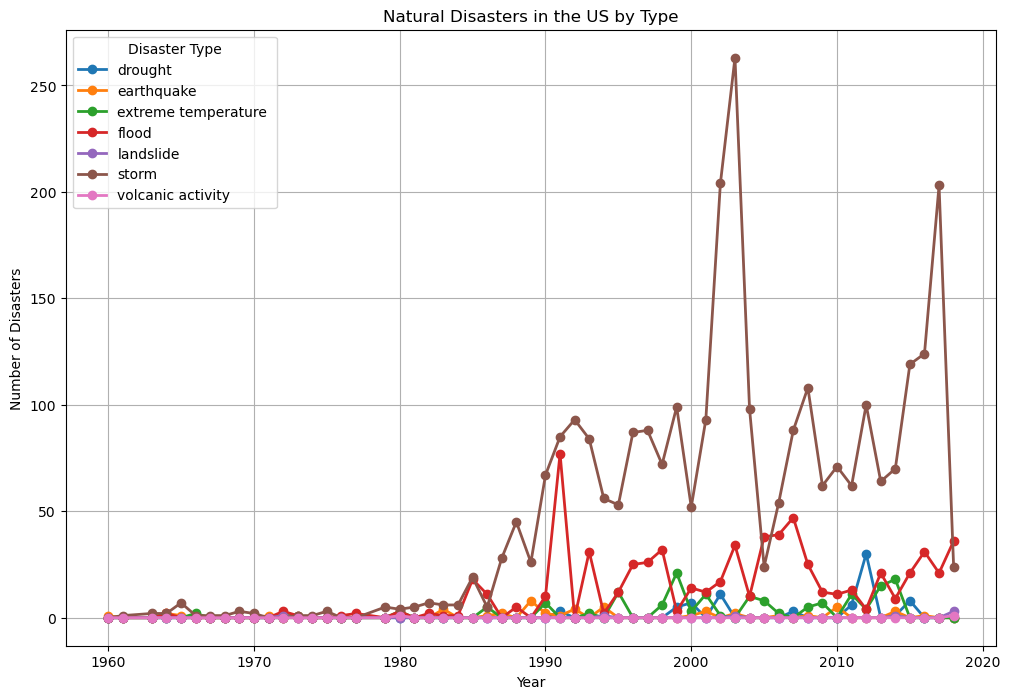

In [46]:
# group by year and disaster type and count the number of disasters
disasters_by_type = merged_data.groupby(['year', 'disastertype'])['disaster_id'].count().unstack(fill_value=0)

# trend over time for different disaster types
plt.figure(figsize=(12, 8))

for disaster_type in disasters_by_type.columns:
    plt.plot(disasters_by_type.index, disasters_by_type[disaster_type], 
             label=disaster_type, marker='o', markersize=6, linewidth=2)

plt.title('Natural Disasters in the US by Type')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend(title='Disaster Type')
plt.grid(True)
plt.show()

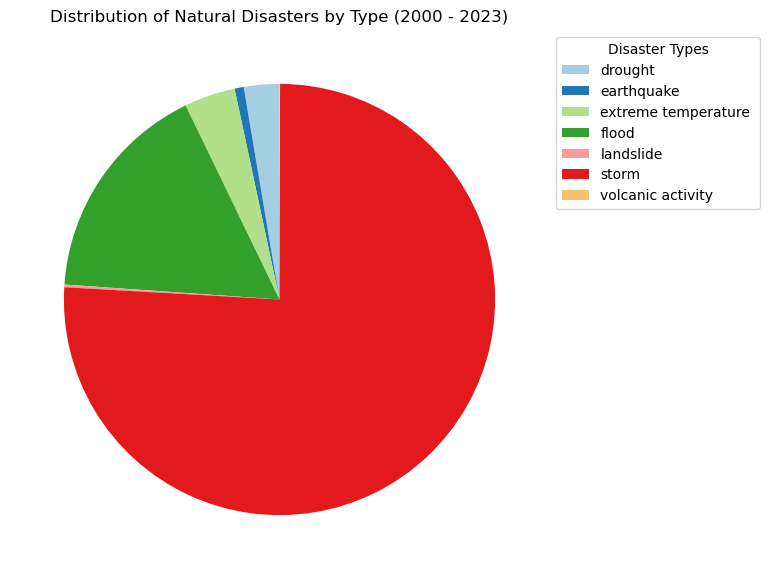

In [47]:
import matplotlib.pyplot as plt

# 2000-2023
filtered_data = merged_data[(merged_data['year'] >= 2000) & (merged_data['year'] <= 2023)]

disasters_by_type = filtered_data.groupby('disastertype').size()

plt.figure(figsize=(10, 7))
colors = plt.cm.Paired.colors

plt.pie(
    disasters_by_type, 
    startangle=90, 
    colors=colors, 
    pctdistance=0.85
)


plt.title("Distribution of Natural Disasters by Type (2000 - 2023)")

# key
plt.legend(disasters_by_type.index, title='Disaster Types', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()



Plot storm data over time since most common

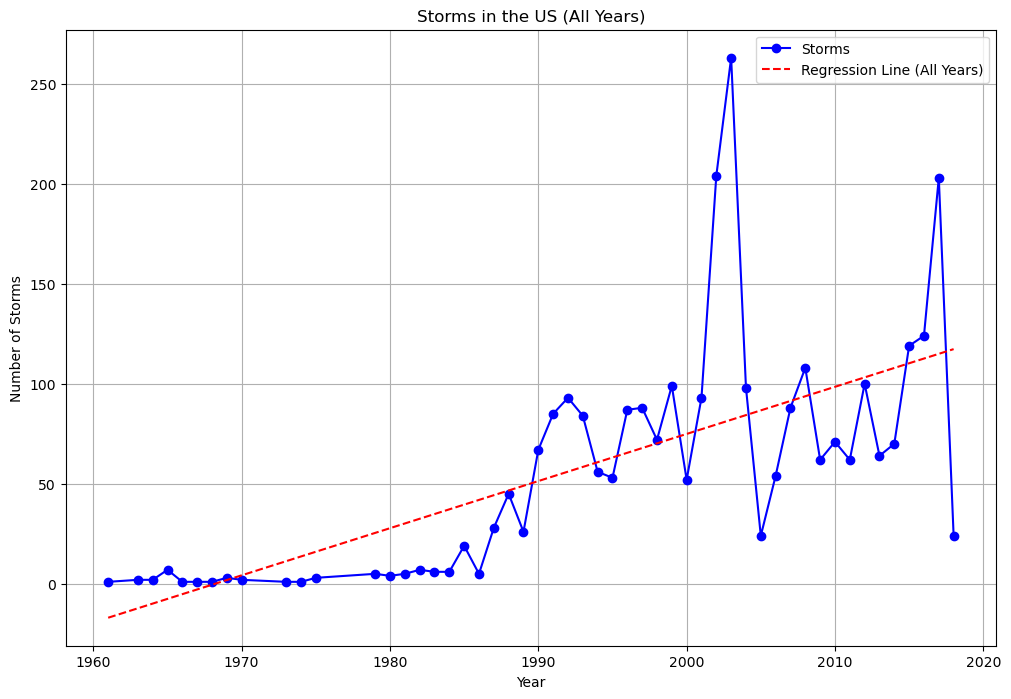

Linear Regression Slope for All Years: 2.355687471440949


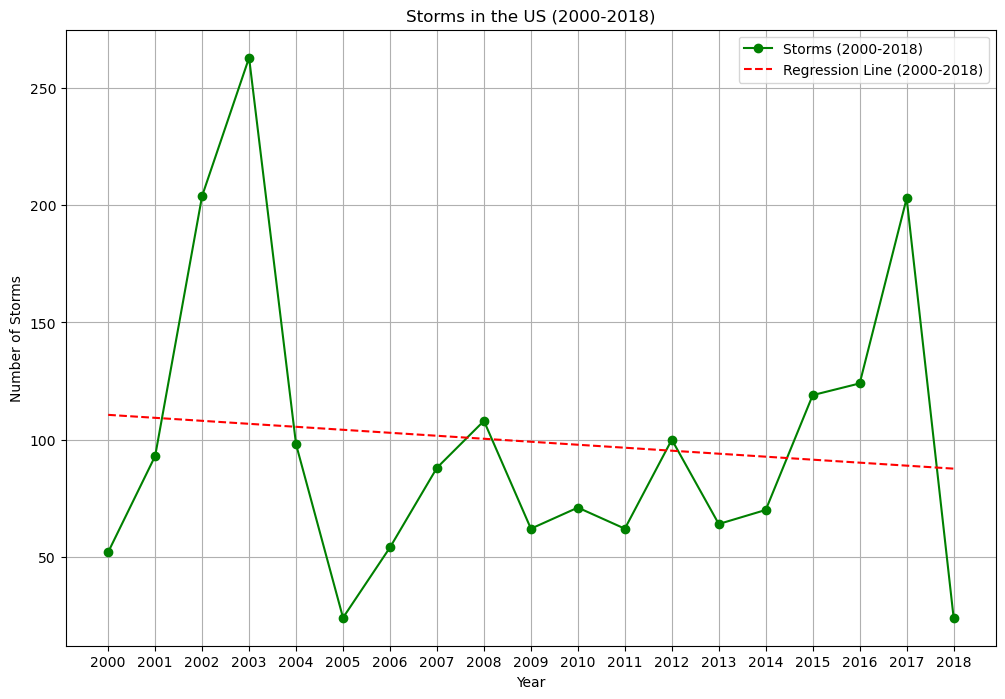

Linear Regression Slope for 2000-2018: -1.2754385964912274


In [48]:
storm_data = merged_data[merged_data['disastertype'] == 'storm']

# group by year and count storms per year
storms_by_year = storm_data.groupby('year')['disaster_id'].count()

# all years
plt.figure(figsize=(12, 8))
plt.plot(storms_by_year.index, storms_by_year.values, marker='o', label='Storms', color='blue')
plt.title('Storms in the US (All Years)')
plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.grid(True)

# linear regression for all years
X_all = storms_by_year.index.values.reshape(-1, 1)
y_all = storms_by_year.values

# model and predict
regressor_all = LinearRegression()
regressor_all.fit(X_all, y_all)
y_all_pred = regressor_all.predict(X_all)


plt.plot(storms_by_year.index, y_all_pred, linestyle='--', color='red', label='Regression Line (All Years)')
plt.legend()
plt.show()

# slope for all years
print(f"Linear Regression Slope for All Years: {regressor_all.coef_[0]}")

# storm data for 2000-2018
storms_by_year_since2000 = storms_by_year[storms_by_year.index >= 2000]
storms_by_year_since2018 = storms_by_year_since2000[storms_by_year_since2000.index <= 2018]

# plot
plt.figure(figsize=(12, 8))
plt.plot(storms_by_year_since2018.index, storms_by_year_since2018.values, marker='o', label='Storms (2000-2018)', color='green')
plt.title('Storms in the US (2000-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.grid(True)


all_years = list(range(2000, 2019))
plt.xticks(all_years)

# linear regression for 2000-2018
X_since2000 = storms_by_year_since2018.index.values.reshape(-1, 1)
y_since2000 = storms_by_year_since2018.values

regressor_since2000 = LinearRegression()
regressor_since2000.fit(X_since2000, y_since2000)
y_since2000_pred = regressor_since2000.predict(X_since2000)

plt.plot(storms_by_year_since2018.index, y_since2000_pred, linestyle='--', color='red', label='Regression Line (2000-2018)')
plt.legend()
plt.show()

# slope for 2000-2018
print(f"Linear Regression Slope for 2000-2018: {regressor_since2000.coef_[0]}")


Hypothesis Test- Inflation rate effect on home insurance (Pearson correlation coefficient)

Null Hypothesis:There is no significant linear relationship between the yearly percentage change in home insurance premiums and inflation rates. (Correlation coefficient = 0)

Alternative Hypothesis: There is a significant linear relationship between the yearly percentage change in home insurance premiums and inflation rates. (Correlation coefficient =! 0)

    year  home_insurance_pct_change  inflation_rate
2   2000                   3.878272        3.376857
3   2001                   4.583752        2.826171
4   2002                   6.001478        1.586032
5   2003                  11.811463        2.270095
6   2004                   7.944625        2.677237
7   2005                   5.095321        3.392747
8   2006                   2.649516        3.225944
9   2007                   1.911749        2.852672
10  2008                   1.649940        3.839100
11  2009                   2.631171       -0.355546
12  2010                   3.067392        1.640043
13  2011                   2.922348        3.156842
14  2012                   3.371160        2.069337
15  2013                   3.192320        1.464833
16  2014                   3.115819        1.622223
17  2015                   3.151170        0.118627
18  2016                   2.230499        1.261583
19  2017                   0.491219        2.130110
20  2018    

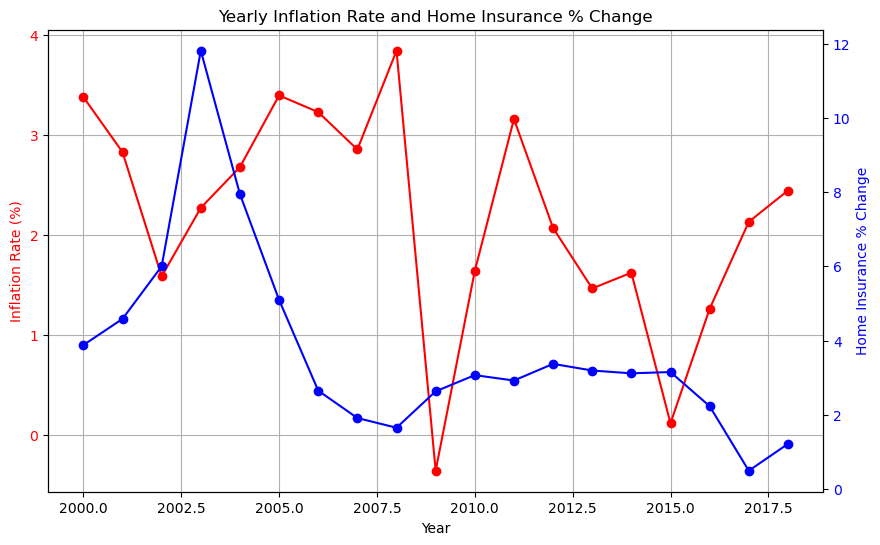

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#inflation data
if 'year' not in inflation_data.columns:
    inflation_data['year'] = pd.to_datetime(inflation_data['observation_date']).dt.year

inflation_data['observation_date'] = pd.to_datetime(inflation_data['observation_date'])
inflation_yearly = inflation_data.groupby('year')['inflation_rate'].mean().reset_index()

# home insurance data
home_data['observation_date'] = pd.to_datetime(home_data['observation_date'])
home_data['year'] = home_data['observation_date'].dt.year
home_yearly = home_data.groupby('year')['Home_Insurance_PPI'].mean().reset_index()
home_yearly['home_insurance_pct_change'] = home_yearly['Home_Insurance_PPI'].pct_change() * 100
home_yearly['home_insurance_pct_change'] = home_yearly['home_insurance_pct_change'].fillna(0)

# merge datasets by year
paired_data = pd.merge(home_yearly[['year', 'home_insurance_pct_change']], 
                       inflation_yearly[['year', 'inflation_rate']], 
                       on='year', how='inner')

paired_data.dropna(inplace=True)
paired_data = paired_data[(paired_data['year'] >= 2000) & (paired_data['year'] <= 2018)]  # adjust years

print(paired_data[['year', 'home_insurance_pct_change', 'inflation_rate']].head(20))

# Pearson correlation test
corr, p_value = pearsonr(paired_data['home_insurance_pct_change'], paired_data['inflation_rate'])
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant linear relationship between the changes in home insurance premiums and inflation rates.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship between the changes in home insurance premiums and inflation rates.")

# plot yearly percentage changes
fig, ax1 = plt.subplots(figsize=(10, 6))

# inflation rate (left)
ax1.plot(paired_data['year'], paired_data['inflation_rate'], marker='o', linestyle='-', color='r', label='Inflation Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# home insurance percentage change (right)
ax2 = ax1.twinx()
ax2.plot(paired_data['year'], paired_data['home_insurance_pct_change'], marker='o', linestyle='-', color='b', label='Home Insurance % Change')
ax2.set_ylabel('Home Insurance % Change', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Yearly Inflation Rate and Home Insurance % Change')
ax1.grid(True)
plt.show()


    year  home_insurance_pct_change_next_year  inflation_rate
2   2000                             4.583752        3.376857
3   2001                             6.001478        2.826171
4   2002                            11.811463        1.586032
5   2003                             7.944625        2.270095
6   2004                             5.095321        2.677237
7   2005                             2.649516        3.392747
8   2006                             1.911749        3.225944
9   2007                             1.649940        2.852672
10  2008                             2.631171        3.839100
11  2009                             3.067392       -0.355546
12  2010                             2.922348        1.640043
13  2011                             3.371160        3.156842
14  2012                             3.192320        2.069337
15  2013                             3.115819        1.464833
16  2014                             3.151170        1.622223
17  2015

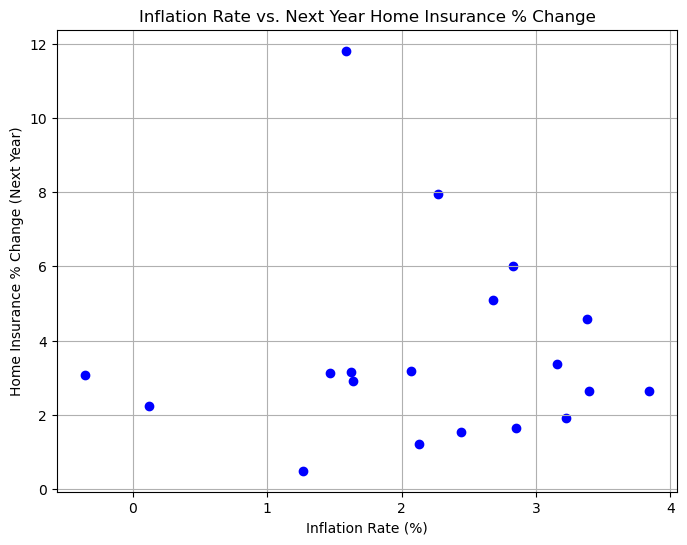

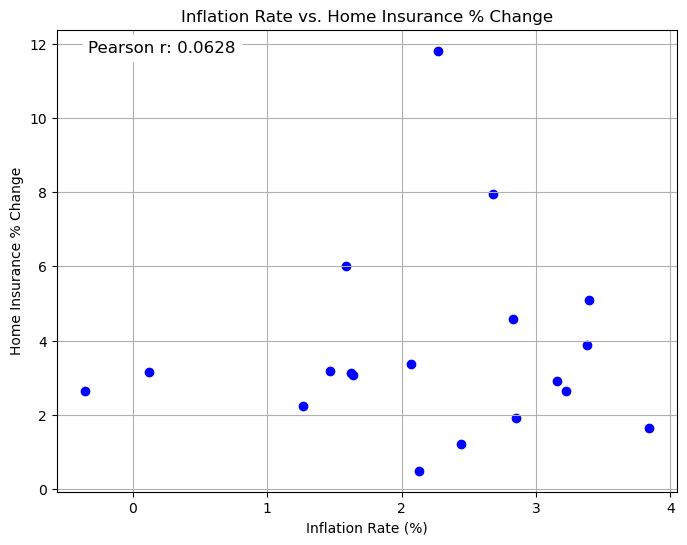

In [50]:
# shift home insurance data by one year
home_yearly['home_insurance_pct_change_next_year'] = home_yearly['home_insurance_pct_change'].shift(-1)

# merge shifted with inflation data
paired_data_shifted = pd.merge(home_yearly[['year', 'home_insurance_pct_change_next_year']], 
                               inflation_yearly[['year', 'inflation_rate']], 
                               on='year', how='inner')

paired_data_shifted.dropna(inplace=True)
paired_data_shifted = paired_data_shifted[(paired_data_shifted['year'] >= 2000) & (paired_data_shifted['year'] <= 2018)]  # adjust years

print(paired_data_shifted[['year', 'home_insurance_pct_change_next_year', 'inflation_rate']].head(20))

# Pearson correlation test
corr_shifted, p_value_shifted = pearsonr(paired_data_shifted['home_insurance_pct_change_next_year'], paired_data_shifted['inflation_rate'])
print(f"Pearson correlation coefficient (shifted): {corr_shifted}")
print(f"P-value (shifted): {p_value_shifted}")

# Results
alpha = 0.05
if p_value_shifted < alpha:
    print("Reject the null hypothesis. There is a significant linear relationship between the previous year's inflation rate and the next year's changes in home insurance premiums.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship between the previous year's inflation rate and the next year's changes in home insurance premiums.")

# scatterplot for inflation rate and next year's insurance rate change
plt.figure(figsize=(8, 6))
plt.scatter(paired_data_shifted['inflation_rate'], paired_data_shifted['home_insurance_pct_change_next_year'], color='b')
plt.title('Inflation Rate vs. Next Year Home Insurance % Change')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Home Insurance % Change (Next Year)')
plt.grid(True)

plt.show()

# Scatter plot(same year)
plt.figure(figsize=(8, 6))
plt.scatter(paired_data['inflation_rate'], paired_data['home_insurance_pct_change'], color='b')
plt.title('Inflation Rate vs. Home Insurance % Change')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Home Insurance % Change')
plt.grid(True)

# Add the correlation coefficient as a text annotation
plt.annotate(f'Pearson r: {corr:.4f}', 
             xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, backgroundcolor='white')

plt.show()


Hypothesis Test- Disaster rate effect on home insurance

Null Hypothesis: There is no significant linear relationship between disaster frequency and home insurance percentage change.

Alternative Hypothesis: There is a significant linear relationship between disaster frequency and home insurance percentage change.

    year  home_insurance_pct_change  disaster_count
2   2000                   3.878272              77
3   2001                   4.583752             119
4   2002                   6.001478             233
5   2003                  11.811463             300
6   2004                   7.944625             118
7   2005                   5.095321              70
8   2006                   2.649516              96
9   2007                   1.911749             138
10  2008                   1.649940             139
11  2009                   2.631171              81
12  2010                   3.067392              87
13  2011                   2.922348              92
14  2012                   3.371160             138
15  2013                   3.192320             100
16  2014                   3.115819             102
17  2015                   3.151170             148
18  2016                   2.230499             156
19  2017                   0.491219             224
20  2018    

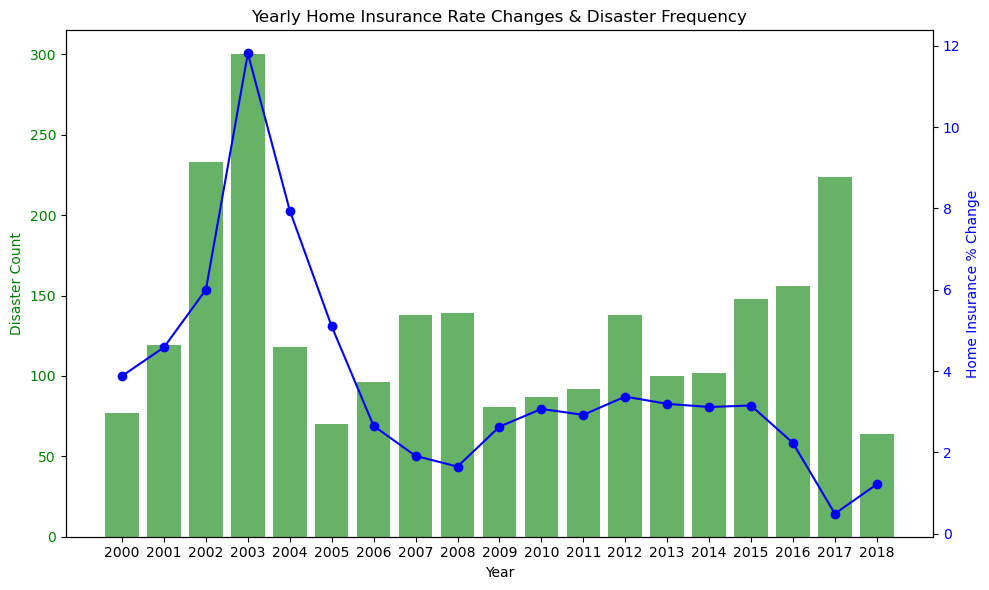

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# total disasters per year
disaster_yearly = merged_data.groupby('year')['disaster_id'].count().reset_index()
disaster_yearly.rename(columns={'disaster_id': 'disaster_count'}, inplace=True)

# merge data
full_data = pd.merge(home_yearly[['year', 'home_insurance_pct_change']], 
                     disaster_yearly[['year', 'disaster_count']], on='year', how='inner')
full_data = full_data[(full_data['year'] >= 2000) & (full_data['year'] <= 2018)]  # adjust years

full_data.dropna(inplace=True)
print(full_data[['year', 'home_insurance_pct_change', 'disaster_count']].head(20))

# Pearson correlation test
corr, p_value = pearsonr(full_data['home_insurance_pct_change'], full_data['disaster_count'])
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant linear relationship between the disaster count and changes in home insurance premiums.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship between the disaster count and changes in home insurance premiums.")


fig, ax1 = plt.subplots(figsize=(10, 6))

# disaster count (left)
ax1.bar(full_data['year'], full_data['disaster_count'], alpha=0.6, color='g', label='Disaster Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Disaster Count', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_xticks(full_data['year'])

# insurance percentage change (right)
ax2 = ax1.twinx()
ax2.plot(full_data['year'], full_data['home_insurance_pct_change'], marker='o', linestyle='-', color='b', label='Home Insurance % Change')
ax2.set_ylabel('Home Insurance % Change', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Yearly Home Insurance Rate Changes & Disaster Frequency')
fig.tight_layout()
plt.show()



    year  home_insurance_pct_change  disaster_count_next_year
2   2000                   3.878272                     119.0
3   2001                   4.583752                     233.0
4   2002                   6.001478                     300.0
5   2003                  11.811463                     118.0
6   2004                   7.944625                      70.0
7   2005                   5.095321                      96.0
8   2006                   2.649516                     138.0
9   2007                   1.911749                     139.0
10  2008                   1.649940                      81.0
11  2009                   2.631171                      87.0
12  2010                   3.067392                      92.0
13  2011                   2.922348                     138.0
14  2012                   3.371160                     100.0
15  2013                   3.192320                     102.0
16  2014                   3.115819                     148.0
17  2015

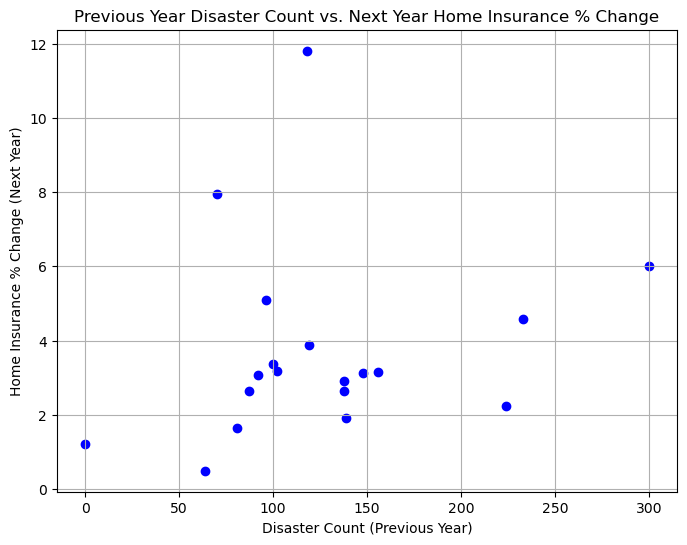

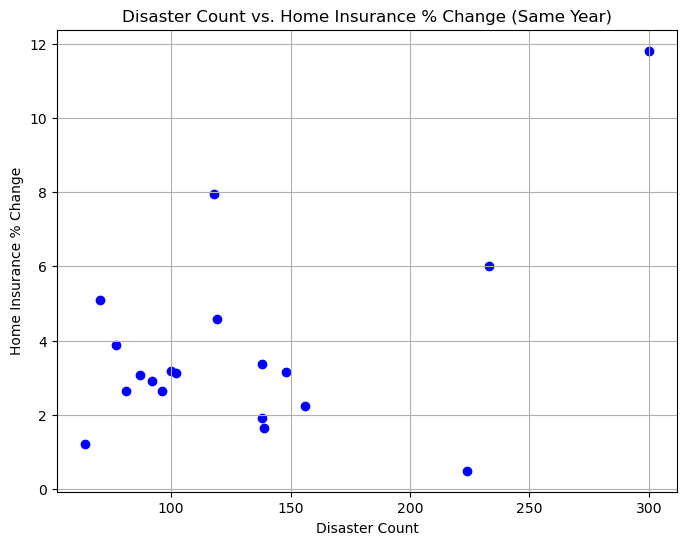

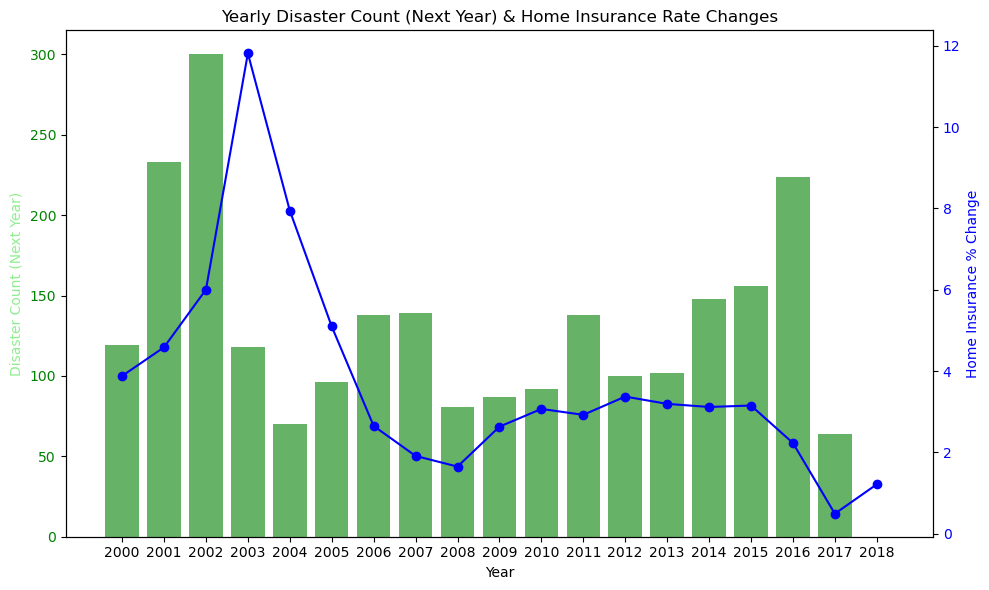

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Shift disaster data by one year to analyze the effect on next year's insurance rates
disaster_yearly['disaster_count_next_year'] = disaster_yearly['disaster_count'].shift(-1)
full_data_shifted = pd.merge(home_yearly[['year', 'home_insurance_pct_change']], 
                             disaster_yearly[['year', 'disaster_count_next_year']], 
                             on='year', how='inner')

full_data_shifted = full_data_shifted[(full_data_shifted['year'] >= 2000) & (full_data_shifted['year'] <= 2018)]
full_data_shifted.dropna(inplace=True)

print(full_data_shifted[['year', 'home_insurance_pct_change', 'disaster_count_next_year']].head(20))

# Pearson correlation test
corr_shifted, p_value_shifted = pearsonr(full_data_shifted['home_insurance_pct_change'], full_data_shifted['disaster_count_next_year'])
print(f"Pearson correlation coefficient (shifted): {corr_shifted}")
print(f"P-value (shifted): {p_value_shifted}")

# Results
alpha = 0.05
if p_value_shifted < alpha:
    print("Reject the null hypothesis. There is a significant linear relationship between the previous year's disaster count and the next year's changes in home insurance premiums.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship between the previous year's disaster count and the next year's changes in home insurance premiums.")

# Scatter plot- disaster count and next year's insurance rate change
plt.figure(figsize=(8, 6))
plt.scatter(full_data_shifted['disaster_count_next_year'], full_data_shifted['home_insurance_pct_change'], color='b')
plt.title('Previous Year Disaster Count vs. Next Year Home Insurance % Change')
plt.xlabel('Disaster Count (Previous Year)')
plt.ylabel('Home Insurance % Change (Next Year)')
plt.grid(True)


plt.show()

# Scatter plot (same year)
plt.figure(figsize=(8, 6))
plt.scatter(full_data['disaster_count'], full_data['home_insurance_pct_change'], color='b')
plt.title('Disaster Count vs. Home Insurance % Change (Same Year)')
plt.xlabel('Disaster Count')
plt.ylabel('Home Insurance % Change')
plt.grid(True)


plt.show()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(full_data_shifted['year'], full_data_shifted['disaster_count_next_year'], alpha=0.6, color='g', label='Disaster Count (Next Year)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Disaster Count (Next Year)', color='lightgreen')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_xticks(full_data_shifted['year'])

ax2 = ax1.twinx()
ax2.plot(full_data_shifted['year'], full_data_shifted['home_insurance_pct_change'], marker='o', linestyle='-', color='b', label='Home Insurance % Change')
ax2.set_ylabel('Home Insurance % Change', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Yearly Disaster Count (Next Year) & Home Insurance Rate Changes')
fig.tight_layout()
plt.show()


Multiple Linear Regression

In [53]:
import pandas as pd
import statsmodels.api as sm

#adjust year 2000-2018
merged_data_filtered = merged_data[(merged_data['year'] >= 2000) & (merged_data['year'] <= 2018)]
disaster_yearly = merged_data.groupby('year')['disaster_id'].count().reset_index()
disaster_yearly.rename(columns={'disaster_id': 'disaster_count'}, inplace=True)

full_data = pd.merge(paired_data, disaster_yearly, on='year', how='inner')
full_data['inflation_pct_change'] = full_data['inflation_rate'].pct_change() * 100
full_data_cleaned = full_data.dropna(subset=['inflation_pct_change', 'disaster_count', 'home_insurance_pct_change'])

# independent variables (inflation percentage change and disaster count)
X = full_data_cleaned[['inflation_pct_change', 'disaster_count']]
X = sm.add_constant(X)

# dependent variable (home insurance percentage change)
y = full_data_cleaned['home_insurance_pct_change']

# multiple linear regression model
model = sm.OLS(y, X).fit()

print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"Coefficients:\n{model.params}")
print(f"P-values:\n{model.pvalues}")


R-squared: 0.2812
Adjusted R-squared: 0.1854
Coefficients:
const                   0.685448
inflation_pct_change   -0.001707
disaster_count          0.023005
dtype: float64
P-values:
const                   0.630276
inflation_pct_change    0.445578
disaster_count          0.029843
dtype: float64


R-Squared: 0.2812
Approximately 28.12% of the variation in home insurance percentage change can be explained by the model (inflation and disaster count).

Inflation_pct_change: -0.001707
A negative coefficient suggests that higher inflation does not significantly increase home insurance rates. The p-value (0.4455) is much greater than 0.05, indicating that inflation likely does not have a strong impact on home insurance rate changes in this model.

Disaster count: 0.023005
For every 1 additional natural disaster per year, the home insurance rate change increases by 2.3% on average. This positive coefficient, with a p-value of 0.0298, is statistically significant, suggesting that disaster frequency does have a significant impact on home insurance percentage changes.


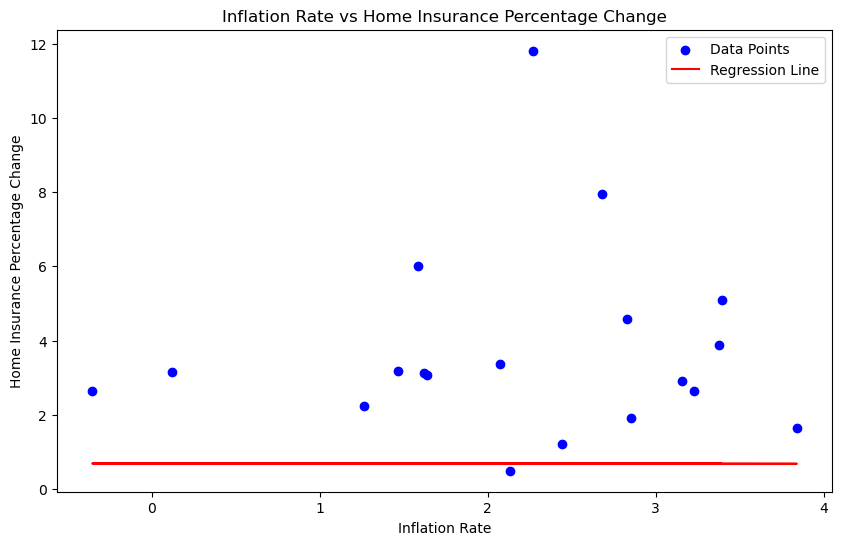

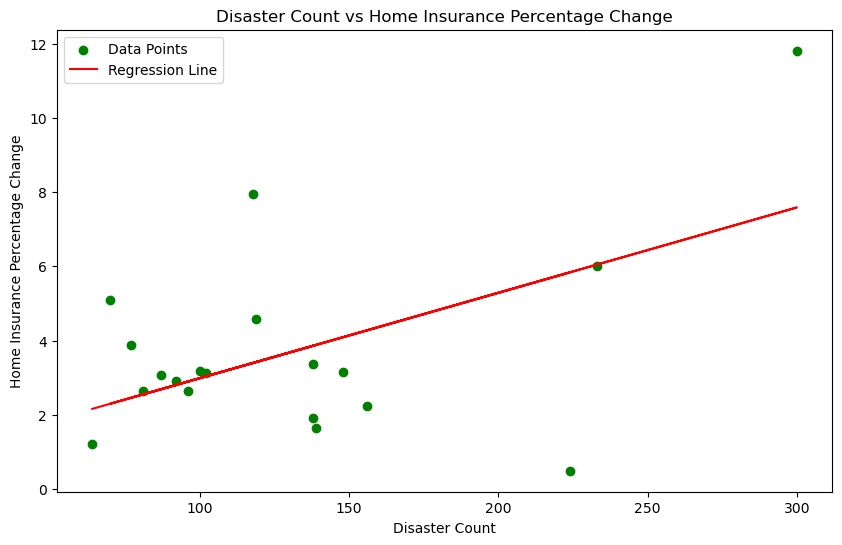

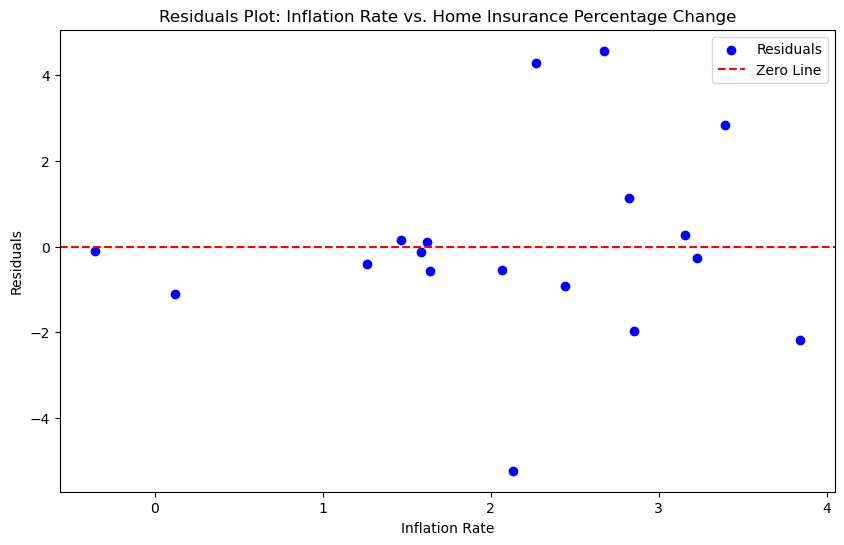

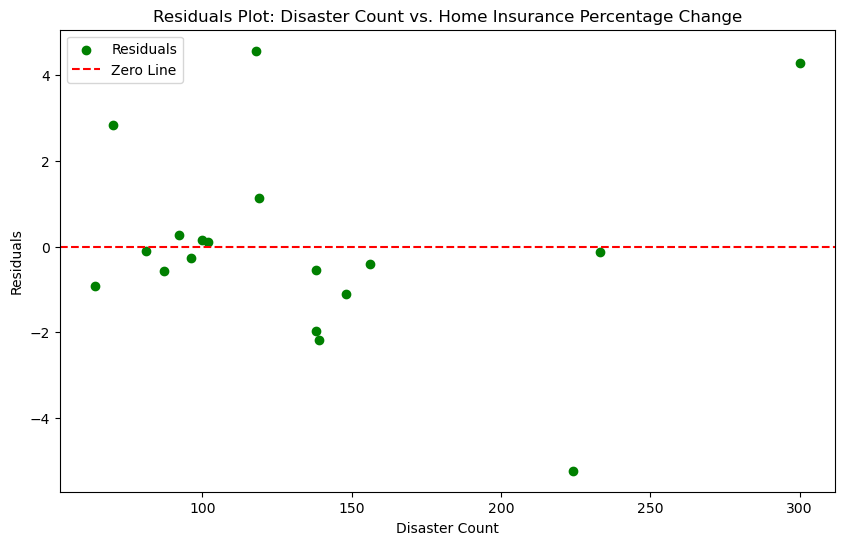

In [54]:
import matplotlib.pyplot as plt

# scatter plot- inflation rate vs home insurance percentage change
plt.figure(figsize=(10, 6))
plt.scatter(full_data['inflation_rate'], full_data['home_insurance_pct_change'], color='blue', label='Data Points')

slope_inflation = model.params['inflation_pct_change']
intercept = model.params['const']
regression_line_inflation = slope_inflation * full_data['inflation_rate'] + intercept
plt.plot(full_data['inflation_rate'], regression_line_inflation, color='red', label='Regression Line')

plt.title('Inflation Rate vs Home Insurance Percentage Change')
plt.xlabel('Inflation Rate')
plt.ylabel('Home Insurance Percentage Change')
plt.legend()
plt.show()


# scatter plot- disaster count vs home insurance percentage change
plt.figure(figsize=(10, 6))
plt.scatter(full_data['disaster_count'], full_data['home_insurance_pct_change'], color='green', label='Data Points')

slope_disaster = model.params['disaster_count']
regression_line_disaster = slope_disaster * full_data['disaster_count'] + intercept
plt.plot(full_data['disaster_count'], regression_line_disaster, color='red', label='Regression Line')
plt.title('Disaster Count vs Home Insurance Percentage Change')
plt.xlabel('Disaster Count')
plt.ylabel('Home Insurance Percentage Change')
plt.legend()
plt.show()


# predicted vals based on the model
predicted_values = model.fittedvalues

# calc residuals (observed values - predicted values)
residuals = full_data['home_insurance_pct_change'] - predicted_values

# residuals plot- inflation_rate
plt.figure(figsize=(10, 6))
plt.scatter(full_data['inflation_rate'], residuals, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals Plot: Inflation Rate vs. Home Insurance Percentage Change')
plt.xlabel('Inflation Rate')
plt.ylabel('Residuals')
plt.legend()

# residuals plot- disasters
plt.figure(figsize=(10, 6))
plt.scatter(full_data['disaster_count'], residuals, color='green', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals Plot: Disaster Count vs. Home Insurance Percentage Change')
plt.xlabel('Disaster Count')
plt.ylabel('Residuals')
plt.legend()
plt.show()


Stacked Area Chart
Shows how the contribution of factors (inflation and disasters) change over time
Plots the proportion of insurance rate increases attributed to each factor

OLS Regression Results:
R-squared: 0.2812
Adjusted R-squared: 0.1854

Coefficients:
Intercept (const): 0.685448
Inflation Impact Coefficient: -0.001707
Disaster Impact Coefficient: 0.023005

P-values:
Intercept (const): 0.630276
Inflation Impact: 0.445578
Disaster Impact: 0.029843


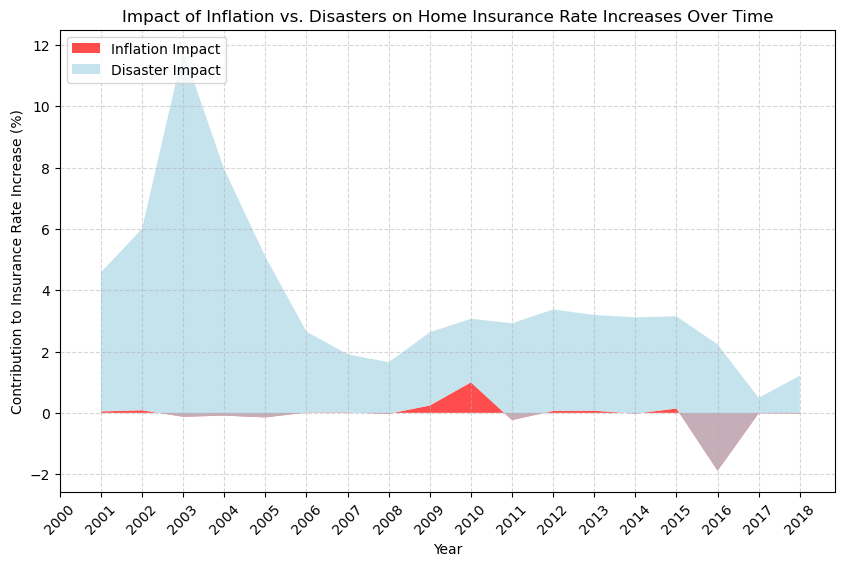

In [55]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

print("OLS Regression Results:")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print("\nCoefficients:")
print(f"Intercept (const): {model.params['const']:.6f}")
print(f"Inflation Impact Coefficient: {model.params['inflation_pct_change']:.6f}")
print(f"Disaster Impact Coefficient: {model.params['disaster_count']:.6f}")

print("\nP-values:")
print(f"Intercept (const): {model.pvalues['const']:.6f}")
print(f"Inflation Impact: {model.pvalues['inflation_pct_change']:.6f}")
print(f"Disaster Impact: {model.pvalues['disaster_count']:.6f}")


# coef from regression model
beta_1, beta_2 = model.params['inflation_pct_change'], model.params['disaster_count']

# calculate contributions
full_data['Inflation_Impact'] = beta_1 * full_data['inflation_pct_change']
full_data['Disaster_Impact'] = beta_2 * full_data['disaster_count']

# normalize contributions to sum up to 100% of the insurance rate change
full_data['Total_Impact'] = full_data['Inflation_Impact'] + full_data['Disaster_Impact']
full_data['Inflation_Impact'] = (full_data['Inflation_Impact'] / full_data['Total_Impact']) * full_data['home_insurance_pct_change']
full_data['Disaster_Impact'] = (full_data['Disaster_Impact'] / full_data['Total_Impact']) * full_data['home_insurance_pct_change']

full_data = full_data[full_data['year'] <= 2018]

# stacked area chart with custom colors
plt.figure(figsize=(10,6))
plt.stackplot(full_data['year'], full_data['Inflation_Impact'], full_data['Disaster_Impact'], 
              labels=['Inflation Impact', 'Disaster Impact'], alpha=0.7, 
              colors=['red', 'lightblue'])
plt.xticks(full_data['year'], rotation=45) 
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))  #show every year

plt.xlabel('Year')
plt.ylabel('Contribution to Insurance Rate Increase (%)')
plt.title('Impact of Inflation vs. Disasters on Home Insurance Rate Increases Over Time')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()



Stacked Area Chart: total height of stacked areas at each year represent total home insuranse % change for that year. Natural Disasters are primarily driving insuranse rate increases.
ex: in 2003 natural disasters contributed to 12% of total home insuranse rate increases that year.

Correlation Heat Map

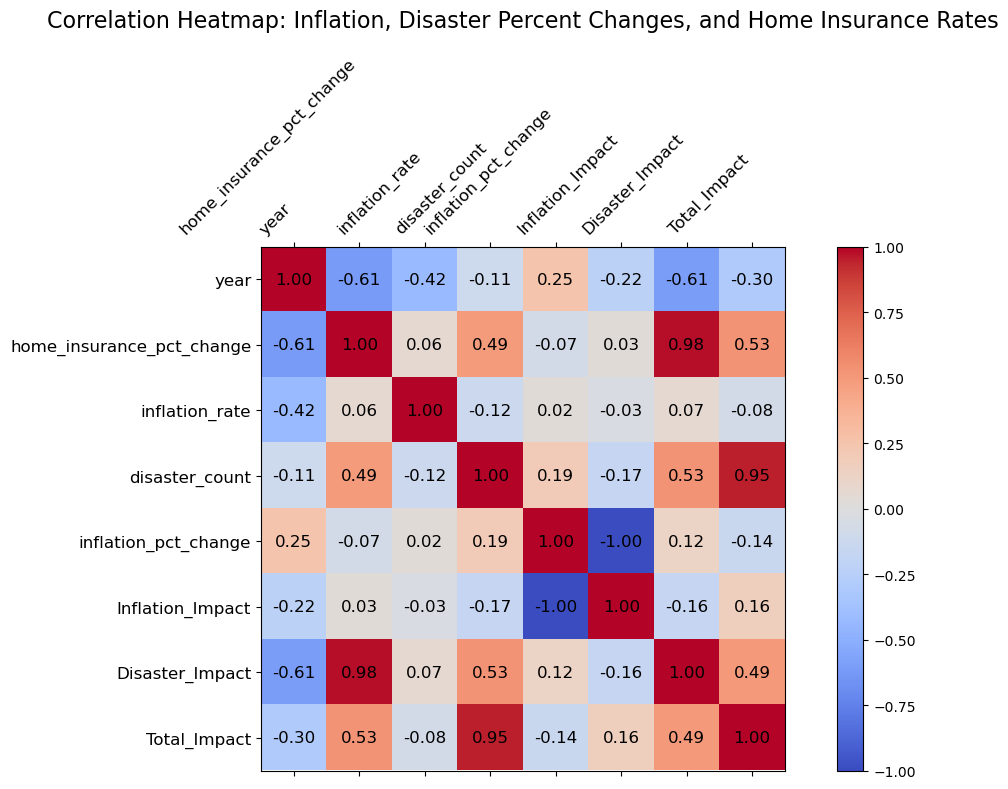

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

numeric_cols = full_data.select_dtypes(include=[np.number]).columns

# calc correlation matrix
corr_matrix = full_data[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(12, 8))

cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(corr_matrix.columns, fontsize=12)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        ax.text(j, i, f'{value:.2f}', ha='center', va='center', color='black', fontsize=12)

plt.title('Correlation Heatmap: Inflation, Disaster Percent Changes, and Home Insurance Rates', fontsize=16, pad=20)
plt.tight_layout()

# Show the plot
plt.show()



Granger Causality Test

In [57]:
from statsmodels.tsa.stattools import grangercausalitytests

# adjust years 2000-2018
full_data = full_data[(full_data['year'] >= 2000) & (full_data['year'] <= 2018)]

# Granger Causality Test
full_data = full_data[['home_insurance_pct_change', 'disaster_count']]

print("Granger Causality Test: Disaster Count -> Home Insurance % Change")
grangercausalitytests(full_data, maxlag=5, verbose=True)


Granger Causality Test: Disaster Count -> Home Insurance % Change

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9413  , p=0.3473  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=1.1295  , p=0.2879  , df=1
likelihood ratio test: chi2=1.0955  , p=0.2953  , df=1
parameter F test:         F=0.9413  , p=0.3473  , df_denom=15, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0555  , p=0.3782  , df_denom=12, df_num=2
ssr based chi2 test:   chi2=2.9907  , p=0.2242  , df=2
likelihood ratio test: chi2=2.7549  , p=0.2522  , df=2
parameter F test:         F=1.0555  , p=0.3782  , df_denom=12, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2012  , p=0.3637  , df_denom=9, df_num=3
ssr based chi2 test:   chi2=6.4066  , p=0.0934  , df=3
likelihood ratio test: chi2=5.3883  , p=0.1455  , df=3
parameter F test:         F=1.2012  , p=0.3637  , df_denom=9, df_num=3

Granger Causality
number of lags (n

/Users/Samantha/opt/anaconda3/envs/capstone/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



{np.int64(1): ({'ssr_ftest': (np.float64(0.9412718894616754),
    np.float64(0.34733612586483303),
    np.float64(15.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(1.1295262673540105),
    np.float64(0.2878764094611784),
    np.int64(1)),
   'lrtest': (np.float64(1.0955027050046766),
    np.float64(0.29525519532637967),
    np.int64(1)),
   'params_ftest': (np.float64(0.9412718894616747),
    np.float64(0.34733612586483303),
    np.float64(15.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(1.0555477812963903),
    np.float64(0.3782013531778975),
    np.float64(12.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(2.9907187136731057),
    np.float64(0.22416803393903742),
    np.int64(2)),
   'lrtest': (np.float64(2.754930876994422),
    np.float64(0.2522170031289689),
    np.int64(2)),
   'params_ftest': (np.float64(1.0555477812964051),
    np.float64(0.37820135317789244),
    np.float64(12.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
      

None of the p-values across all lags are below 0.05, so fail to reject the null hypothesis, indicating that there is no evidence of Granger causality from disaster count to home insurance rate changes. Past disaster count does not statistically predict changes in home insurance premiums, despite having a linear relationship.

In [58]:
from statsmodels.tsa.stattools import grangercausalitytests
paired_data = paired_data[['home_insurance_pct_change', 'inflation_rate']]

print("Granger Causality Test: Inflation Rate -> Home Insurance % Change")
grangercausalitytests(full_data, maxlag=5, verbose=True)


Granger Causality Test: Inflation Rate -> Home Insurance % Change

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9413  , p=0.3473  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=1.1295  , p=0.2879  , df=1
likelihood ratio test: chi2=1.0955  , p=0.2953  , df=1
parameter F test:         F=0.9413  , p=0.3473  , df_denom=15, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0555  , p=0.3782  , df_denom=12, df_num=2
ssr based chi2 test:   chi2=2.9907  , p=0.2242  , df=2
likelihood ratio test: chi2=2.7549  , p=0.2522  , df=2
parameter F test:         F=1.0555  , p=0.3782  , df_denom=12, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2012  , p=0.3637  , df_denom=9, df_num=3
ssr based chi2 test:   chi2=6.4066  , p=0.0934  , df=3
likelihood ratio test: chi2=5.3883  , p=0.1455  , df=3
parameter F test:         F=1.2012  , p=0.3637  , df_denom=9, df_num=3

Granger Causality
number of lags (n

/Users/Samantha/opt/anaconda3/envs/capstone/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



{np.int64(1): ({'ssr_ftest': (np.float64(0.9412718894616754),
    np.float64(0.34733612586483303),
    np.float64(15.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(1.1295262673540105),
    np.float64(0.2878764094611784),
    np.int64(1)),
   'lrtest': (np.float64(1.0955027050046766),
    np.float64(0.29525519532637967),
    np.int64(1)),
   'params_ftest': (np.float64(0.9412718894616747),
    np.float64(0.34733612586483303),
    np.float64(15.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(1.0555477812963903),
    np.float64(0.3782013531778975),
    np.float64(12.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(2.9907187136731057),
    np.float64(0.22416803393903742),
    np.int64(2)),
   'lrtest': (np.float64(2.754930876994422),
    np.float64(0.2522170031289689),
    np.int64(2)),
   'params_ftest': (np.float64(1.0555477812964051),
    np.float64(0.37820135317789244),
    np.float64(12.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
      

None of the p-values across all lags are below 0.05, so fail to reject the null hypothesis, indicating that there is no evidence of Granger causality from inflation to home insurance rate changes. Inflation does not statistically predict changes in home insurance premiums.

In [59]:
import pandas as pd
import plotly.express as px

# natural disasters by state
disasters_by_state = natural_disasters['adm1'].value_counts().reset_index()
disasters_by_state.columns = ['state', 'num_disasters']

# names to state codes
us_states = pd.read_csv("https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv")
disasters_by_state = disasters_by_state.merge(us_states, left_on='state', right_on='State', how='left')

# map
fig = px.choropleth(disasters_by_state,
                    locations="Abbreviation",
                    locationmode="USA-states",
                    color="num_disasters",
                    hover_name="state",
                    hover_data=["num_disasters"],
                    color_continuous_scale="dense",
                    labels={'num_disasters': 'Number of Natural Disasters'},
                    scope="usa"
                   )

fig.update_layout(
    title_text="Natural Disasters by State in the USA",
    title_x=0.5,
    width=750, height=600, 
    coloraxis_colorbar=dict(len=0.6),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.update_traces(marker_line_color='white', marker_line_width=1.0)

fig.show()


In [61]:
import pandas as pd
import plotly.express as px

disasters_geo = natural_disasters.dropna(subset=['longitude', 'latitude'])

# Scatter Geo Plot
fig = px.scatter_geo(disasters_geo,
                     lon='longitude',
                     lat='latitude',
                     scope='usa',
                     color='disastertype',
                     hover_name='disastertype',
                     hover_data={'longitude': True, 'latitude': True, 'year': True},
                     title='Natural Disaster Hotspots in the USA',
                     opacity=0.6,
                     color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_layout(
    geo=dict(
        scope='usa',
        landcolor='lightgray',
        showcountries=False,
        showland=True,
        showlakes=True,
        lakecolor='lightblue'
    ),
    margin=dict(l=0, r=0, t=50, b=0),
    width=800,
    height=600
)

fig.show()


In [62]:
import pandas as pd
import plotly.express as px

disasters_geo = natural_disasters.dropna(subset=['longitude', 'latitude'])

px.set_mapbox_access_token("pk.eyJ1IjoiZGVtb3VzZXIiLCJhIjoiY2t1N3F0a3NzMDJodTJwcGZ5bjg5amQ5eCJ9.-r1nQl1oA2iHKXtV4qD0nQ")

# density heatmap
fig = px.density_mapbox(disasters_geo,
                        lat='latitude',
                        lon='longitude',
                        z=None,
                        radius=10,
                        center=dict(lat=37.0902, lon=-95.7129),  # center of country
                        zoom=3.5,
                        mapbox_style="carto-positron",
                        hover_data={'disastertype': True, 'year': True}
)

fig.update_layout(
    title='Natural Disaster Density in the USA',
    title_x=0.5,
    margin=dict(l=0, r=0, t=40, b=0),
    width=800,
    height=600
)

fig.show()
